## 問題設定と対象データセット

*どのような問題に取り組んだか*

気温とアイスクリームの売上金額の関係

*対象データセット*

icecream_data.txt


## 使用した機械学習手法

単回帰分析


## その実装（独自の実装のソースコードを掲載 or 既存の実装を明示）
numpyを使用して数値計算
Scikit-learnを使用
matplotlibを使用してグラフ描画
ソースコードをCodeのセルとして記入

## 機械学習の実行過程

*以下のセルに記入。複数のセル（Markdown,Code）に分ける*

icecream.txt：

#year mounth temperature ice_cream_sales
2018 1 10 507
2018 2 10 416
2018 3 14 607
2018 4 19 746
2018 5 23 894
2018 6 26 1021
2018 7 30 1506
2018 8 31 1443
2018 9 27 861
2018 10 22 640
2018 11 17 492
2018 12 12 537
2019 1 9 494
2019 2 11 423
2019 3 12 542
2019 4 18 667
2019 5 23 1000
2019 6 25 991
2019 7 29 1236
2019 8 31 1513
2019 9 26 996
2019 10 20 724
2019 11 15 531
2019 12 10 584
2020 1 10 510
2020 2 11 482
2020 3 13 610
2020 4 20 689
2020 5 24 1040
2020 6 26 1123
2020 7 30 1155
2020 8 32 1658
2020 9 27 1025
2020 10 23 649
2020 11 18 537
2020 12 13 599
2021 1 11 510
2021 2 11 458
2021 3 12 602
2021 4 17 708
2021 5 23 915
2021 6 24 1089
2021 7 28 1485
2021 8 31 1427
2021 9 27 973
2021 10 20 779
2021 11 16 582
2021 12 12 620
2022 1 11 581
2022 2 12 504
2022 3 13 631
2022 4 19 781
2022 5 24 975
2022 6 25 1109
2022 7 28 1551
2022 8 31 1516
2022 9 28 1083
2022 10 21 794
2022 11 16 660
2022 12 10 663

main.py：

[[  10.  507.]
 [  10.  416.]
 [  14.  607.]
 [  19.  746.]
 [  23.  894.]
 [  26. 1021.]
 [  30. 1506.]
 [  31. 1443.]
 [  27.  861.]
 [  22.  640.]
 [  17.  492.]
 [  12.  537.]
 [   9.  494.]
 [  11.  423.]
 [  12.  542.]
 [  18.  667.]
 [  23. 1000.]
 [  25.  991.]
 [  29. 1236.]
 [  31. 1513.]
 [  26.  996.]
 [  20.  724.]
 [  15.  531.]
 [  10.  584.]
 [  10.  510.]
 [  11.  482.]
 [  13.  610.]
 [  20.  689.]
 [  24. 1040.]
 [  26. 1123.]
 [  30. 1155.]
 [  32. 1658.]
 [  27. 1025.]
 [  23.  649.]
 [  18.  537.]
 [  13.  599.]
 [  11.  510.]
 [  11.  458.]
 [  12.  602.]
 [  17.  708.]
 [  23.  915.]
 [  24. 1089.]
 [  28. 1485.]
 [  31. 1427.]
 [  27.  973.]
 [  20.  779.]
 [  16.  582.]
 [  12.  620.]
 [  11.  581.]
 [  12.  504.]
 [  13.  631.]
 [  19.  781.]
 [  24.  975.]
 [  25. 1109.]
 [  28. 1551.]
 [  31. 1516.]
 [  28. 1083.]
 [  21.  794.]
 [  16.  660.]
 [  10.  663.]]
Training Dataset:
[[  32. 1658.]
 [  19.  746.]
 [  24.  975.]
 [  25.  991.]
 [  27.  861.]
 [  30

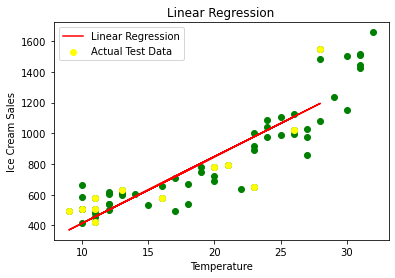

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import csv

#データセットの読み込み、必要データの抽出
def create_dataset():
    with open("Simple_Regression_Analysis/icecream_data.txt", "r") as data:
        reader = csv.reader(data, delimiter=" ")
        next(reader)
        training_data = []
        for row in reader:
            temperature = float(row[2])  # temperature
            icecream_sales = int(row[3])  # ice_cream_sales
            training_data.append([temperature, icecream_sales])
    training_data = np.array(training_data)
    return training_data

# データの分割
def split_data(training_data):
    x = [d[0] for d in training_data]  # temperature
    y = [d[1] for d in training_data]  # ice_cream_sales
    return x, y

#トレーニングデータをトレーニングセットとテストセットに分割
def split_training_and_test(training_data):
    training_data_set, test_data_set = train_test_split(training_data, test_size=0.2, random_state=42)
    return training_data_set, test_data_set

# 説明変数と目的変数の分割
def split_Exv_and_Tgv(training_data_set):
    X_train = training_data_set[:, 0]  # 温度（説明変数）
    Y_train = training_data_set[:, 1]  # 売上金額（目的変数）
    return X_train, Y_train

# 線形回帰モデルの作成と学習
def model_studying(X_train, Y_train):
    model = LinearRegression()
    model.fit(X_train.reshape(-1, 1), Y_train)
    return model

# テストデータの予測
def predict(test_data_set, model):
    X_test = test_data_set[:, 0]  # 温度（説明変数）
    Y_test = test_data_set[:, 1]  # 売上金額（目的変数）
    Y_pred = model.predict(X_test.reshape(-1, 1))
    return X_test, Y_test, Y_pred

# トレーニングデータの学習
def study(X_train, Y_train):
    slope, intercept = np.polyfit(X_train.flatten(), Y_train, 1)
    return slope, intercept

# 重みベクトルとバイアスの定義
def dec_slope_and_intercept(slope, intercept):
    w = np.array([slope])
    b = intercept
    return w, b

# 予測結果の表示
def get_result(X_test, w, b):
    print("予測結果:")
    predicted = np.dot(X_test.reshape(-1, 1), w) + b  # すべてのテストデータに対して予測を計算
    for i in range(len(X_test)):
        print("温度: {:.2f}  ->  予測売上金額: {:.2f}".format(X_test[i], predicted[i]))
    return predicted

def plot_graph(x, y, X_test, Y_test, predicted):
# 散布図のプロット
    plt.scatter(x, y, color='green')
    # 線形回帰直線のプロット
    plt.plot(X_test, predicted.flatten(), color='red', label='Linear Regression')
    plt.scatter(X_test, Y_test, color='yellow', label='Actual Test Data')
    plt.xlabel('Temperature')  # X軸ラベル命名
    plt.ylabel('Ice Cream Sales')  # Y軸ラベル命名
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    training_data = create_dataset()
    print(training_data)
    x, y = split_data(training_data)
    training_data_set, test_data_set = split_training_and_test(training_data)
    print("Training Dataset:")
    print(training_data_set)
    print("\nTest Dataset:")
    print(test_data_set)
    X_train, Y_train = split_Exv_and_Tgv(training_data_set)
    print(X_train)
    print(type(X_train))
    model = model_studying(X_train, Y_train)
    X_test, Y_test, Y_pred = predict(test_data_set, model)
    print(f"Y_pred: {Y_pred}, {type(Y_pred)}")
    slope, intercept = study(X_train, Y_train)
    print(f"slope, intercept: {slope}, {intercept}")
    w, b = dec_slope_and_intercept(slope, intercept)
    print(f"w, b: {w}, {b}")
    predicted = get_result(X_test, w, b)
    plot_graph(x, y, X_test, Y_test, predicted)

## 評価・まとめ



機械学習モデルの評価やまとめを以下に示す。

定量的な評価:

平均二乗誤差または 平均絶対誤差を計算して、モデルの予測精度を評価する。

In [3]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(Y_test, Y_pred)
mae = mean_absolute_error(Y_test, Y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")


MSE: 26317.458538123905
MAE: 128.63632092559894


決定係数 (Coefficient of Determination) を計算して、モデルの予測の説明力を評価する

In [4]:
from sklearn.metrics import r2_score

r2 = r2_score(Y_test, Y_pred)

print(f"R^2 Score: {r2}")

R^2 Score: 0.7045857957336599


定性的な評価:

散布図と線形回帰直線をプロットし、実際のテストデータと予測結果を視覚的に比較する。

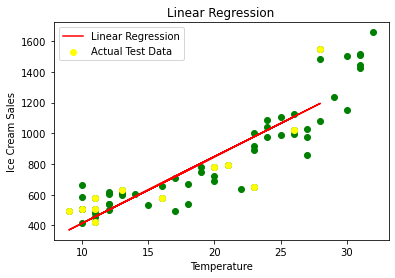

In [5]:
def plot_graph(x, y, X_test, Y_test, predicted):
    plt.scatter(x, y, color='green')
    plt.plot(X_test, predicted.flatten(), color='red', label='Linear Regression')
    plt.scatter(X_test, Y_test, color='yellow', label='Actual Test Data')
    plt.xlabel('Temperature')
    plt.ylabel('Ice Cream Sales')
    plt.title('Linear Regression')
    plt.legend()
    plt.show()

plot_graph(x, y, X_test, Y_test, predicted)


評価のまとめ:
このモデルは、気温とアイスクリームの売上金額の関係を線形回帰モデルを用いてモデリングした。平均二乗誤差や平均絶対誤差による定量的な評価から、モデルの予測精度が評価された。また、決定係数を計算することで、モデルが予測の説明力を持つことも示された。
さらに、散布図と線形回帰直線のプロットにより、実際のテストデータと予測結果を視覚的に比較した。この可視化結果から、モデルが気温とアイスクリームの売上金額の間に正の線形関係を捉えていることが確認できる。
このモデルは気温とアイスクリームの売上金額の関係をうまくモデル化できており、予測の精度や説明力が高いことが示された。

## 参考文献リスト

・Sebastian Raschka/Vahid Mirjalili,Python機械学習プログラミング,高橋隆志,株式会社インプレス,東京都千代田区,2022/8/21

・いまにゅのプログラミング塾, 7.単回帰分析と重回帰分析,Chainer, https://tutorials.chainer.org/ja/07_Regression_Analysis.html ,2023/7,17

・いまにゅのプログラミング塾,【機械学習入門】Pythonで機械学習を実装したい人がはじめに見る動画（教師あり学習・回帰）,Youtube, https://youtu.be/MulTGYX5JS0 , 2023/7/17